## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [54]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [55]:
# Copy the training data to use to insert noise
x_train_noisy = x_train.copy()

# Noise is added here
# The max value of the noise should not grossly surpass 1.0

for i in range(len(x_train_noisy)):
    rvals = np.random.normal(0, 0.1, 784)
    noise = x_train_noisy[i] + rvals
    x_train_noisy[i] = noise

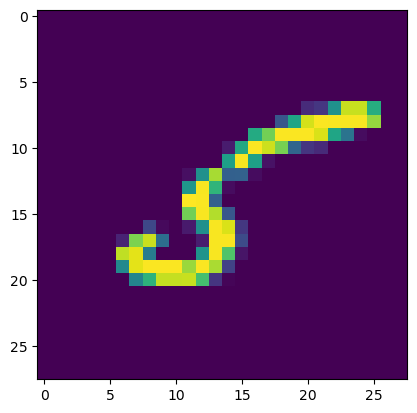

In [37]:
# Display an original image
plt.imshow(x_train[11].reshape(28,28))

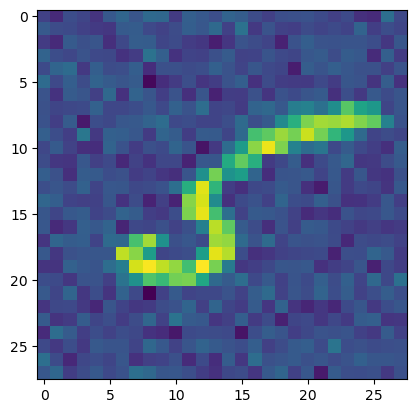

In [40]:
plt.imshow(x_train_noisy[11].reshape(28,28))

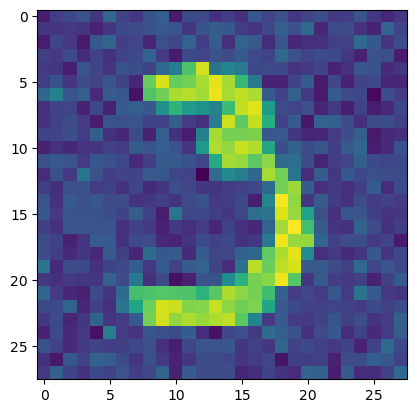

In [41]:
# Show a couple more to validate noise is random
plt.imshow(x_train_noisy[330].reshape(28,28))

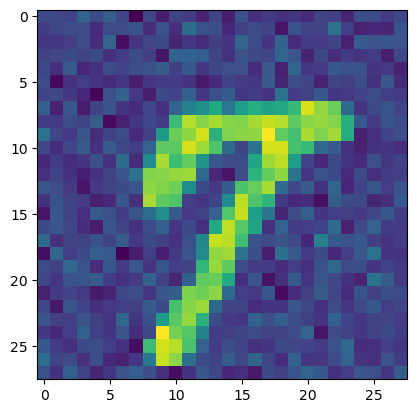

In [42]:
plt.imshow(x_train_noisy[28723].reshape(28,28))

We now have a process to insert noise, and one set of noisy data.

Next, we train on the clean data to get Accuracy and Loss.

In [56]:
# Create empty array to capture the accuracy scores
scores = []

In [57]:
batch_size = 128
num_classes = 10
#epochs = 20
epochs = 2

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Fit the original "clean" data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Store the Accuracy
scores.append(score[1])

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8658 - loss: 0.4484 - val_accuracy: 0.9692 - val_loss: 0.0985
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9673 - loss: 0.1056 - val_accuracy: 0.9763 - val_loss: 0.0752
Test loss: 0.07584462314844131
Test accuracy: 0.9763000011444092


In [59]:
## Fit the noisy data
history = model.fit(x_train_noisy, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# store the accuracy
scores.append(score[1])
scores

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9734 - loss: 0.0853 - val_accuracy: 0.9788 - val_loss: 0.0635
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9842 - loss: 0.0470 - val_accuracy: 0.9800 - val_loss: 0.0688
Test loss: 0.06946561485528946
Test accuracy: 0.9800000190734863


[0.9763000011444092, 0.9800000190734863]

In [60]:
# Vary the scale of the randomization to create noisy data
noise_scale = [.5, 1.0, 2.0, 4.0]

for i in noise_scale:
    print("Noise Scale: ", i)
    

Noise Scale:  0.5
Noise Scale:  1.0
Noise Scale:  2.0
Noise Scale:  4.0


In [61]:

# Loop through the noise scale values
for i in noise_scale:
    # Copy the training data to use to insert noise
    x_train_noisy = x_train.copy()

    # Noise is added here

    for j in range(len(x_train_noisy)):
        rvals = np.random.normal(0, i, 784)
        noise = x_train_noisy[j] + rvals
        x_train_noisy[j] = noise

    # Fit the noisy data
    history = model.fit(x_train_noisy, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)) 
    score = model.evaluate(x_test, y_test, verbose=0)
    scores.append(score[1])

scores

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8671 - loss: 0.4711 - val_accuracy: 0.9692 - val_loss: 0.0926
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9653 - loss: 0.1059 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7239 - loss: 0.8955 - val_accuracy: 0.9600 - val_loss: 0.1479
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8504 - loss: 0.4344 - val_accuracy: 0.9588 - val_loss: 0.1395
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4275 - loss: 1.7748 - val_accuracy: 0.9343 - val_loss: 0.3912
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5335 - loss: 1.3328 - val_accuracy: 0.9243 - val_loss: 0.3757
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2159 - loss: 2.2614 - val_accuracy: 0.8844 - val_loss: 0.9265
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2728 - loss: 2.0316 - val_accuracy: 0.

[0.9763000011444092,
 0.9800000190734863,
 0.9764000177383423,
 0.9588000178337097,
 0.9243000149726868,
 0.8799999952316284]

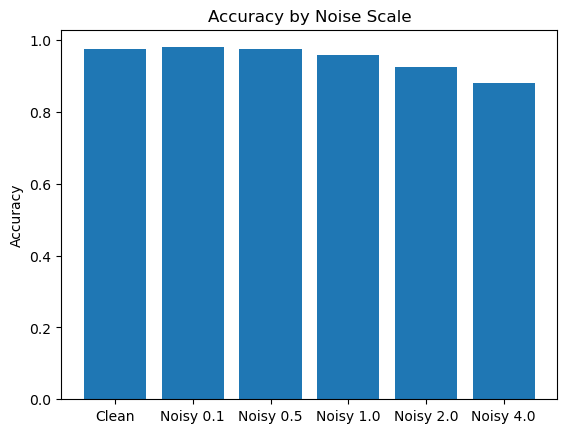

In [62]:
# Use a Bar chart to show the results
labels = ['Clean', 'Noisy 0.1', 'Noisy 0.5', 'Noisy 1.0', 'Noisy 2.0', 'Noisy 4.0']

plt.bar(labels, scores)
plt.ylabel('Accuracy')
plt.title('Accuracy by Noise Scale')
plt.show()